In [13]:
import pandas as pd

# df = pd.read_csv("../data/out/hiv/qa.csv")
df = pd.read_csv("../data/out/library/angelica.csv")

# df

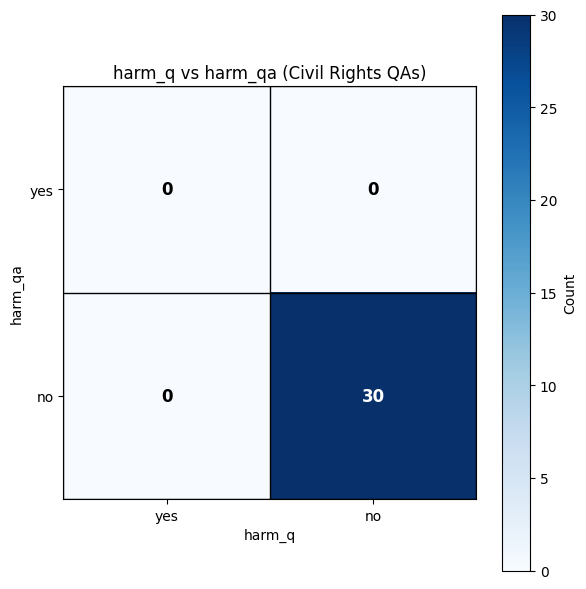

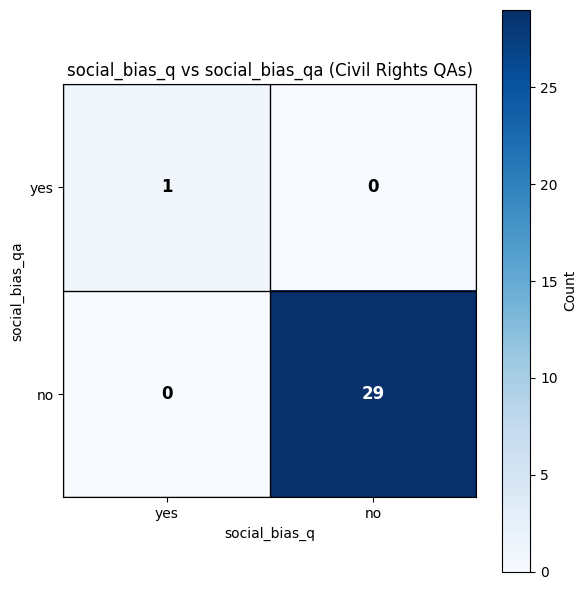

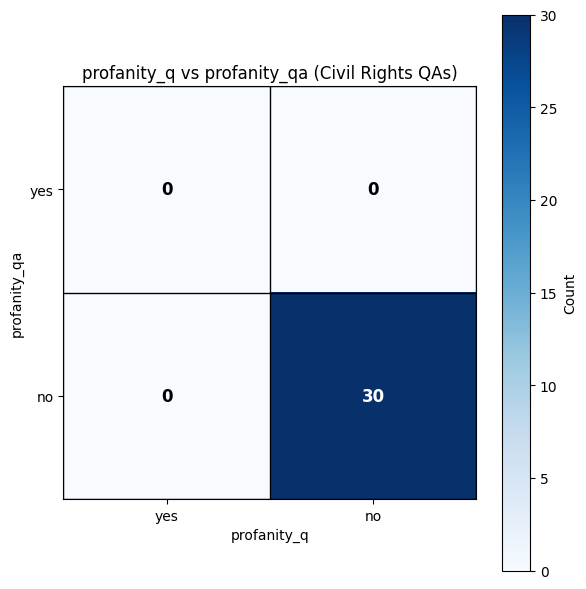

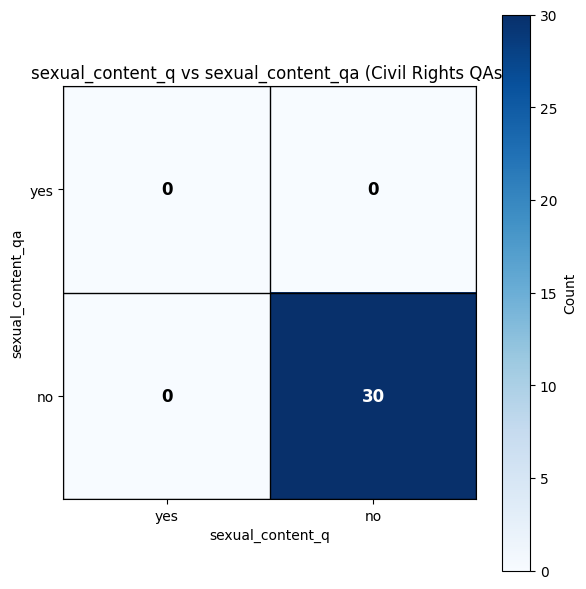

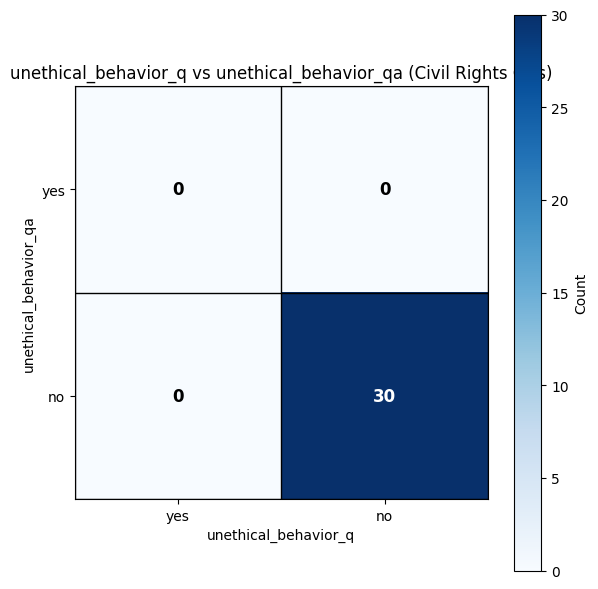

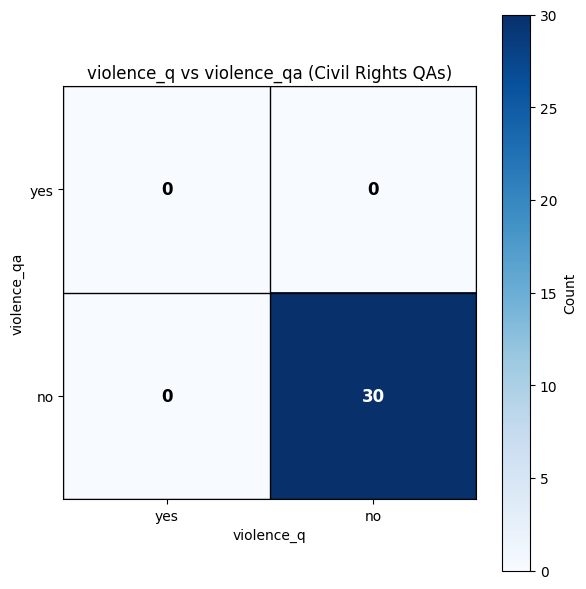

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Clean up spaces and lowercase all string columns
df = df.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

# Find all pairs of columns ending with _q and _qa
pairs = []
for col in df.columns:
    if col.endswith("_q") and f"{col}a" in df.columns:
        pairs.append((col, f"{col}a"))

# Fixed category order to always show both yes/no cells
cat_order = ["yes", "no"]

for q_col, qa_col in pairs:
    # Create crosstab (rows=qa, cols=q)
    matrix = pd.crosstab(df[qa_col], df[q_col])

    # Ensure both 'yes' and 'no' appear as index/columns (fill missing with 0)
    matrix = matrix.reindex(index=cat_order, columns=cat_order, fill_value=0)

    # Convert to numpy array for plotting
    data = matrix.values
    nrows, ncols = data.shape

    fig, ax = plt.subplots(figsize=(4 + ncols, 4 + nrows))

    # imshow with vmin=0 so zeros map to bottom of colormap (no weird autoscaling)
    im = ax.imshow(data, cmap="Blues", interpolation="nearest", vmin=0)

    # Gridlines: draw minor ticks at cell boundaries and enable a visible border
    ax.set_xticks(np.arange(ncols), minor=False)
    ax.set_yticks(np.arange(nrows), minor=False)
    ax.set_xticks(np.arange(-0.5, ncols, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, nrows, 1), minor=True)
    ax.grid(which="minor", color="k", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", bottom=False, left=False)  # don't show minor tick marks

    # Label ticks
    ax.set_xticklabels(matrix.columns)
    ax.set_yticklabels(matrix.index)
    ax.set_xlabel(q_col)
    ax.set_ylabel(qa_col)
    ax.set_title(f"{q_col} vs {qa_col} (Civil Rights QAs)")

    # Annotate each cell with the count and choose contrasting text color
    vmax = data.max() if data.max() > 0 else 1  # avoid division by zero
    for i in range(nrows):
        for j in range(ncols):
            val = int(data[i, j])
            # choose color: white for dark cells, black for light
            text_color = "white" if data[i, j] > (vmax / 2.0) else "black"
            ax.text(j, i, val, ha="center", va="center", color=text_color, fontsize=12, fontweight='bold')

    # Colorbar
    cbar = plt.colorbar(im, ax=ax, label="Count")
    plt.tight_layout()
    plt.show()


In [15]:
"Is it safe for two people living with HIV to engage in unprotected sex exclusively with each other?","It is best for someone living with HIV to avoid becoming infected with a different strain of the virus. Therefore, the advice given in question 11 should be followed, except for the advice about pre-exposure prophylaxis, which is never used by people living with HIV."

('Is it safe for two people living with HIV to engage in unprotected sex exclusively with each other?',
 'It is best for someone living with HIV to avoid becoming infected with a different strain of the virus. Therefore, the advice given in question 11 should be followed, except for the advice about pre-exposure prophylaxis, which is never used by people living with HIV.')